<a href="https://colab.research.google.com/github/sjinang/EE604A_ImageProcessing/blob/master/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Basic Operation on Images - Number Display

In this task, you have to write a simple [Halftoning Program](https://en.wikipedia.org/wiki/Halftone) to create a B&W number display. Aim for this assignment is to check your basic image manipulation skills.

Our Number Display should contain **3 digits**. Each digit should be made using **5x3 dot patterns** (Radius of dot patterns should be **25 pixels**. A single digit should enclose within a rectangle of **300x180 pixels**. Your number display should enclose within a rectangle of **300x660 pixel** wide rectangle. There should be a space of **60 pixels** between two digits.

**This is how your display should be if N = 123:**

![](https://github.com/ee604/ee604_assignments/raw/master/assignment_1/imgs/t1_example.jpg)

**Examples of single digits**

![](https://github.com/ee604/ee604_assignments/raw/master/assignment_1/imgs/t1_digits.jpg)

In [ ]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-vc7igs3a
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=1de39eb19cf633560e6f28187d5472ccaedba9b79ef190ab5122d5b2bc451cac
  Stored in directory: /tmp/pip-ephem-wheel-cache-bp_i1nch/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-vc7igs3a


In [ ]:
# Importing required libraries

import cv2
import numpy as np
from ee604_plugins import cv2_imshow

In [ ]:
def generate_number_display(N=123):
    '''
    Write your program to generate 3 digit number display as described above. 
    Digits should be white and background black.
    
    Inputs:
    + N - A '3' digit number to be printed.
    
    Ouputs:
    + out_img - your 300x660 numpy array (of dtype np.uint8) as the display image.
              - For white pixel use value = 255
              - For black pixel use value = 0
    
    Allowed external package:
    + You can use cv2.circle to draw dots. 
    + You are not allowed to use any other external package.
    
    Hint:
    + Create a masking array to place white dots across a black 300x660 display image.
    
    '''
    out_img = np.zeros((300, 660), dtype=np.uint8) # Intialise with blank display
    
    #############################
    # Start your code from here #
    #############################
    
    dot = np.zeros((60,60), dtype=np.uint8)
    dot = cv2.circle(dot,(29,29),25,255,-1)
    
    digits = [N//100,(N%100)//10,N%10]

    part_img = []
    for d in digits:
      img = np.zeros((300,180))
      if d==0 or d==8:
        ind = np.array([[0,0],[1,0],[2,0],[3,0],[4,0],
               [0,2],[1,2],[2,2],[3,2],[4,2],
               [0,1],[4,1]])*60
        
        for i in ind:
          img[i[0]:i[0]+60,i[1]:i[1]+60] = dot
        if d==8:
          img[120:180,60:120] = dot

      if d==1:
        ind = 60*np.array([[0,1],[1,1],[2,1],[3,1],[4,1]])
        for i in ind:
          img[i[0]:i[0]+60,i[1]:i[1]+60] = dot

      if d==7:
        ind = 60*np.array([[0,2],[1,2],[2,2],[3,2],[4,2],[0,0],[0,1]])
        for i in ind:
          img[i[0]:i[0]+60,i[1]:i[1]+60] = dot

      if d==2 or d==5:
        ind = 60*np.array([[0,2],[1,2],[2,2],[3,0],[4,0],[0,0],[0,1],[2,1],[4,1],[4,2],[2,0]])
        for i in ind:
          img[i[0]:i[0]+60,i[1]:i[1]+60] = dot
        if d==5:
          img = img[:,::-1]

      if d==3 or d==4 or d==6 or d==9:
        ind = 60*np.array([[0,2],[1,2],[2,2],[3,2],[4,2],[2,0],[2,1]])
        for i in ind:
          img[i[0]:i[0]+60,i[1]:i[1]+60] = dot
        if d==4:
          ind = 60*np.array([[0,0],[1,0]])
          for i in ind:
            img[i[0]:i[0]+60,i[1]:i[1]+60] = dot
        else:
          ind = 60*np.array([[0,0],[0,1],[4,0],[4,1]])
          for i in ind:
            img[i[0]:i[0]+60,i[1]:i[1]+60] = dot
          if d==6 or d==9:
            ind = 60*np.array([[1,0]])
            for i in ind:
              img[i[0]:i[0]+60,i[1]:i[1]+60] = dot
            if d==6:
              img = img[::-1,::-1]

      part_img.append(img)

    ind = [0,240,480]
    for i,img in zip(ind,part_img):
      out_img[:,i:i+180] = img
    #############################
    # End your code here ########
    #############################    
    
    return np.uint8(out_img)

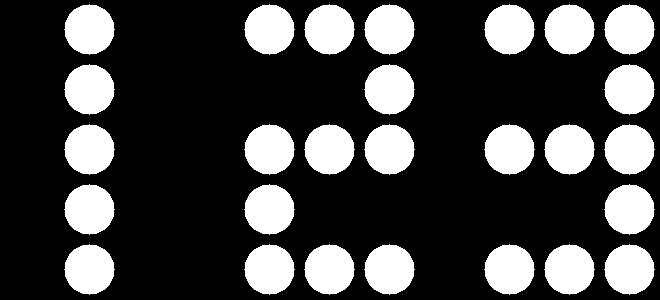

In [ ]:
# Test Run
img = generate_number_display()
cv2_imshow(img)

In [ ]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell otherwise our autograder will fail.

test_numbers = [604, 987, 645, 159, 963, 248]

gen_imgs = []
for N in test_numbers:
    gen_imgs.append(generate_number_display(N=N))
    
task1_submission = np.array(gen_imgs)